# IMPORTING LIBRARIES

In [494]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Stastics
from scipy import stats as st
import pylab

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix , r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [495]:
df=pd.read_csv("data.csv")

In [496]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [497]:
df.shape

(4600, 18)

In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [499]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [500]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

# Exploratory Data Analysis

In [501]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [502]:
df['bedrooms']=df['bedrooms'].astype(int)

In [503]:
df['bathrooms']=df['bathrooms'].astype(int)

In [504]:
df['price']=df['price'].astype(int)

In [505]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000,3,1,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000,5,2,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000,3,2,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000,3,2,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000,4,2,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


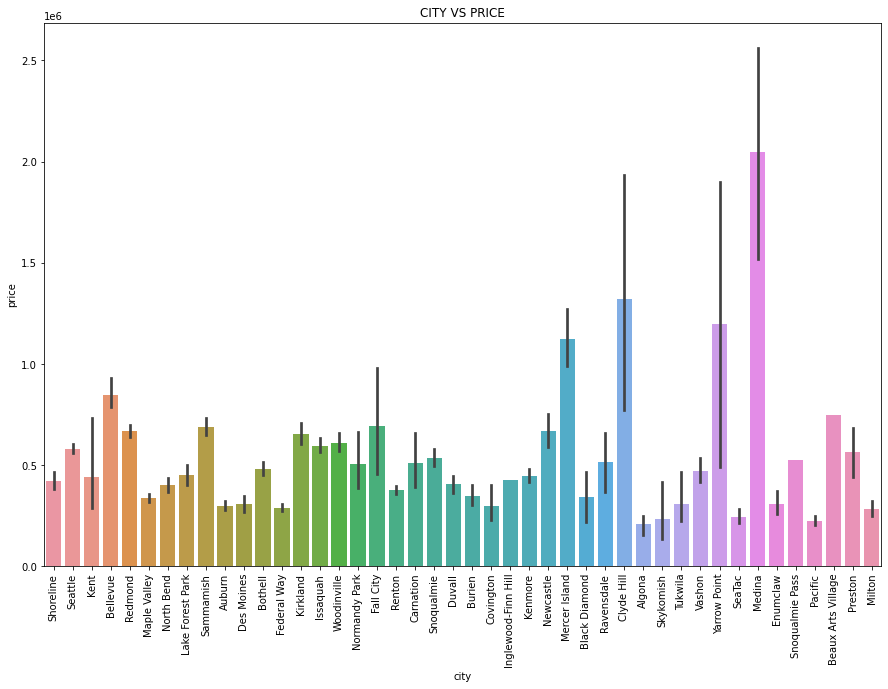

In [506]:
plt.figure(figsize=(15,10))
plt.title("CITY VS PRICE")
sns.barplot(x='city',y='price',data=df)
plt.xticks(rotation=90)
plt.show()

In [507]:
df['bedrooms'].value_counts()

3    2032
4    1531
2     566
5     353
6      61
1      38
7      14
0       2
8       2
9       1
Name: bedrooms, dtype: int64

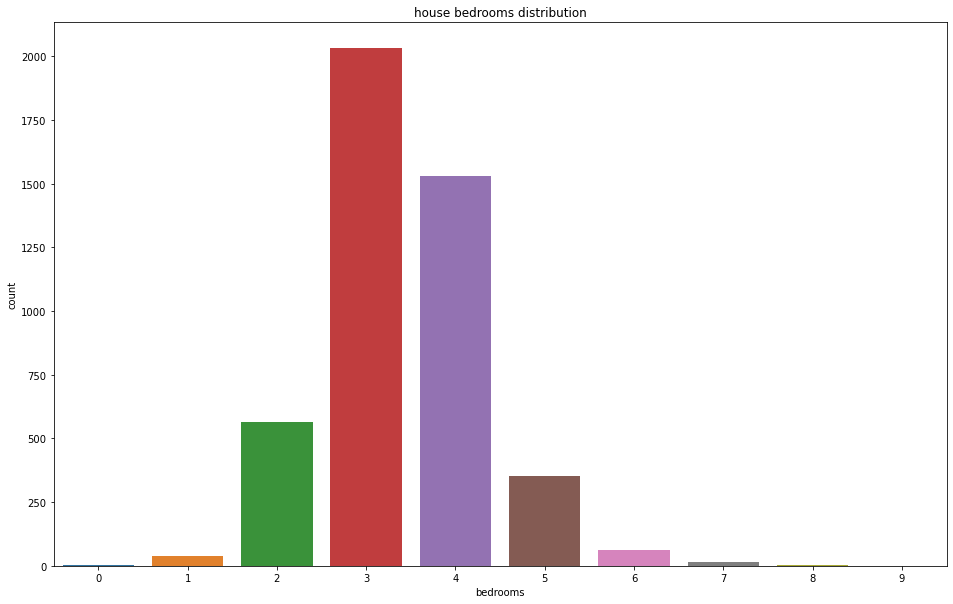

In [508]:
plt.figure(figsize=(16,10))
plt.title("house bedrooms distribution")
sns.countplot(df['bedrooms'],data=df)
plt.show()

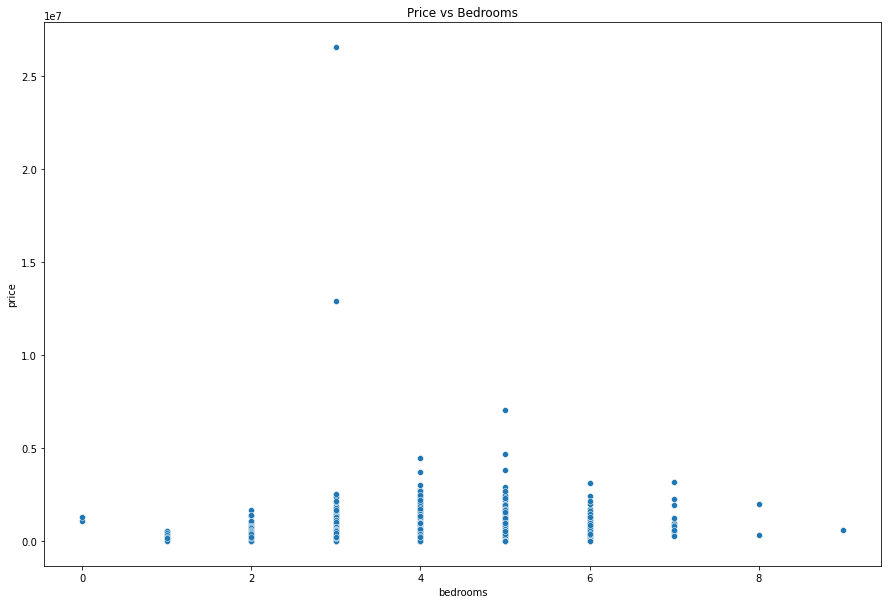

In [509]:
plt.figure(figsize=(15,10))
plt.title("Price vs Bedrooms")
sns.scatterplot(x='bedrooms',y='price',data=df,palette='Set2');

In [510]:
df['bathrooms'].value_counts()

2    2311
1    1666
3     502
4      82
0      19
5      15
6       4
8       1
Name: bathrooms, dtype: int64

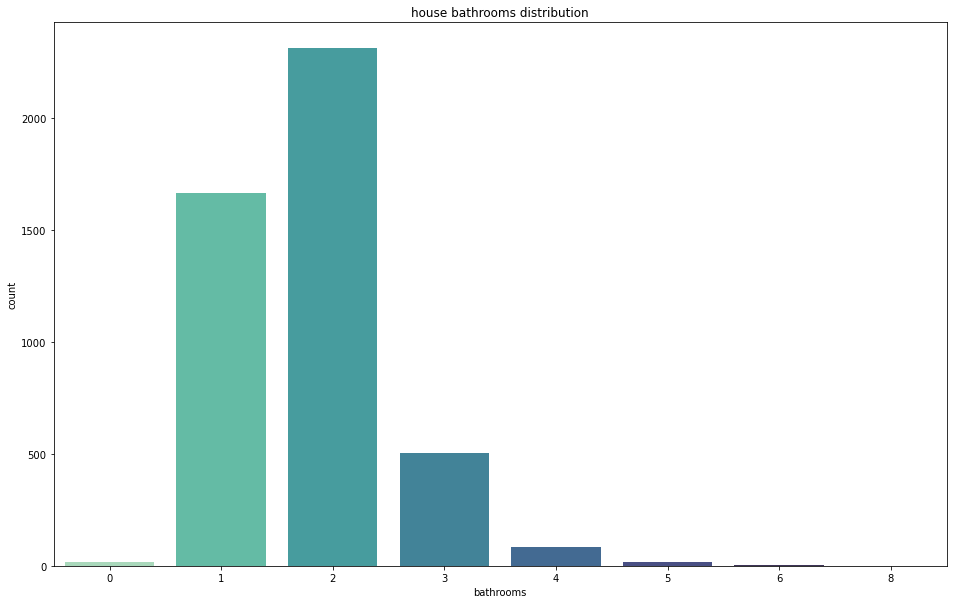

In [511]:
plt.figure(figsize=(16,10))
plt.title("house bathrooms distribution")
sns.countplot(df['bathrooms'],data=df,palette="mako_r")
plt.show()

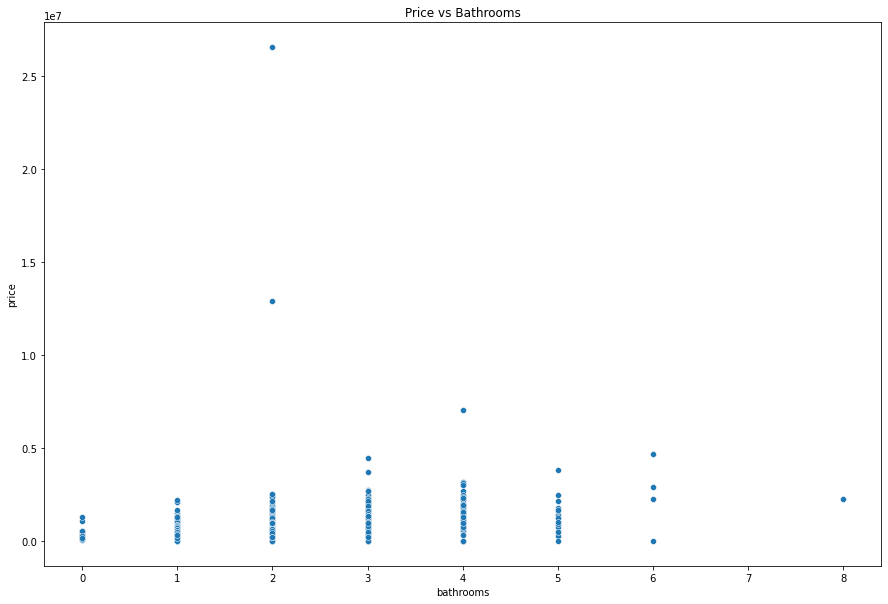

In [512]:
plt.figure(figsize=(15,10))
plt.title("Price vs Bathrooms")
sns.scatterplot(x='bathrooms',y='price',data=df,palette='Set2');

In [513]:
df['floors']=df['floors'].astype(int)

In [514]:
df['floors'].value_counts()

1    2618
2    1852
3     130
Name: floors, dtype: int64

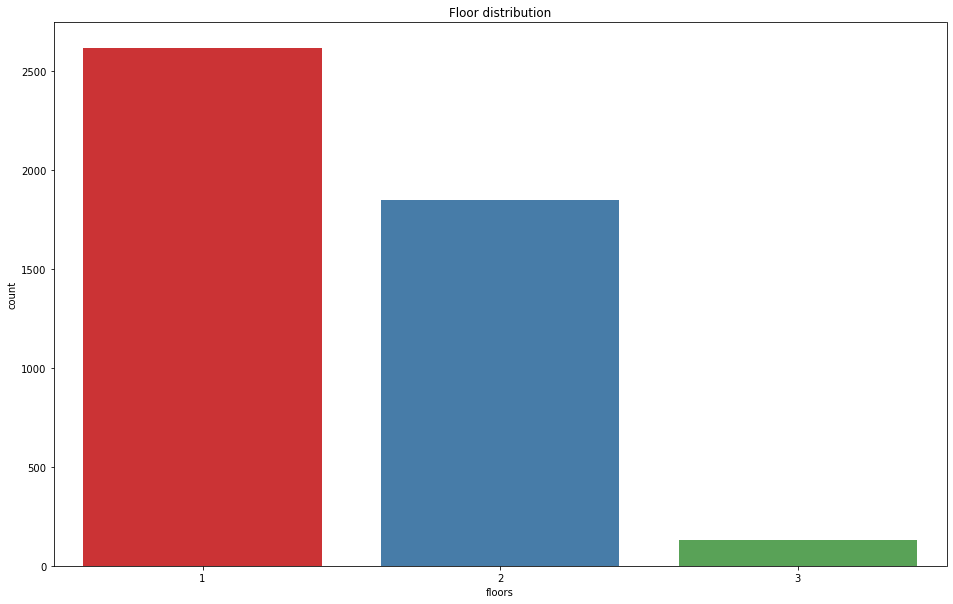

In [515]:
plt.figure(figsize=(16,10))
plt.title("Floor distribution")
sns.countplot(df['floors'],data=df,palette='Set1')
plt.show()

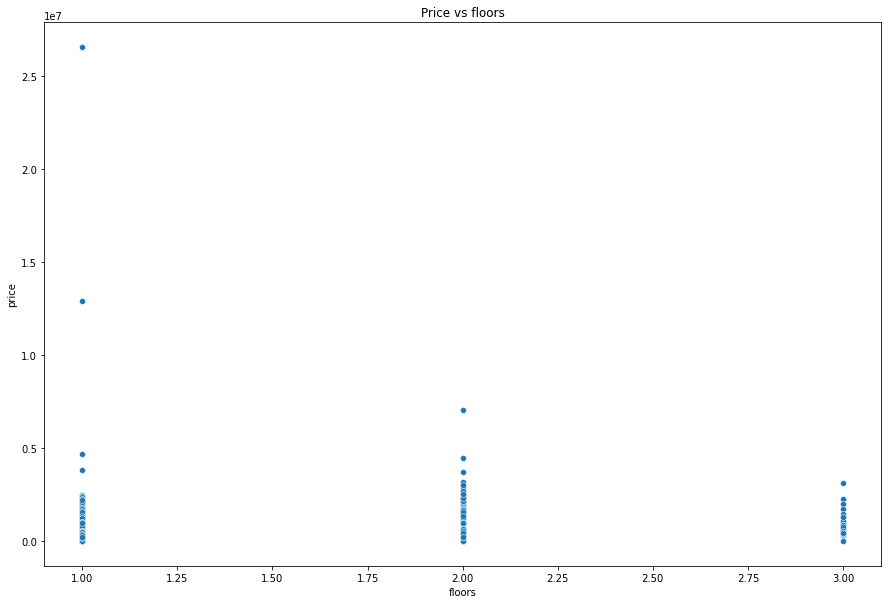

In [516]:
plt.figure(figsize=(15,10))
plt.title("Price vs floors")
sns.scatterplot(x='floors',y='price',data=df,palette='Set2');

In [517]:
df['yr_built'].value_counts()

2006    111
2005    104
2007     93
2004     92
1978     90
       ... 
1915      6
1935      6
1933      5
1934      4
1936      3
Name: yr_built, Length: 115, dtype: int64

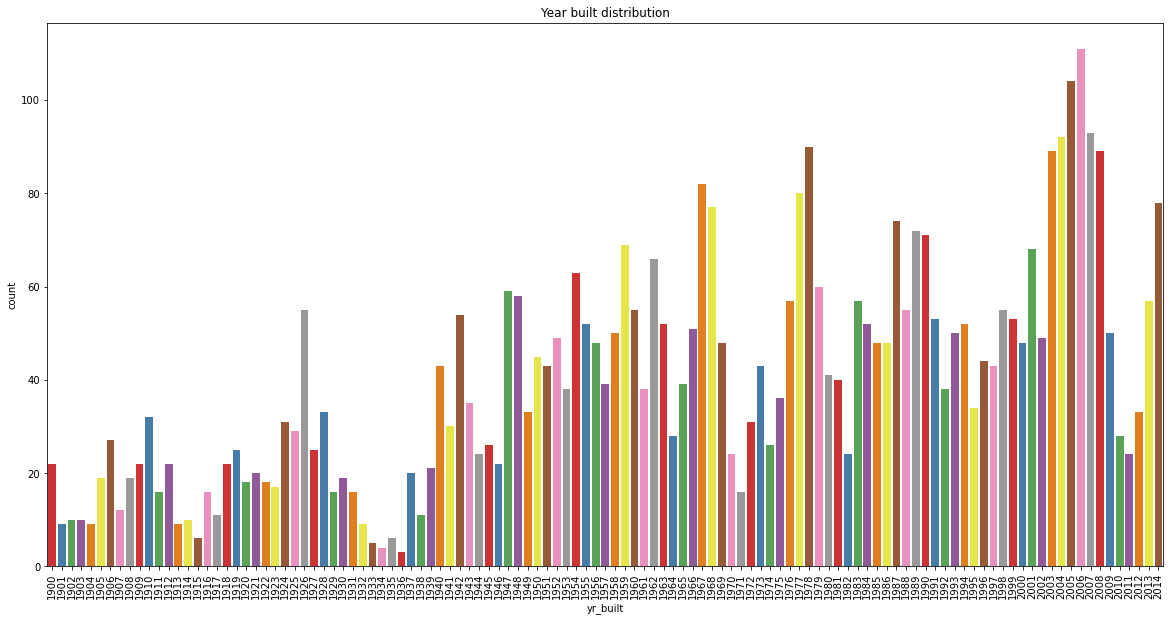

In [518]:
plt.figure(figsize=(20,10))
plt.title("Year built distribution")
sns.countplot(df['yr_built'],data=df,palette='Set1')
plt.xticks(rotation=90)
plt.show()

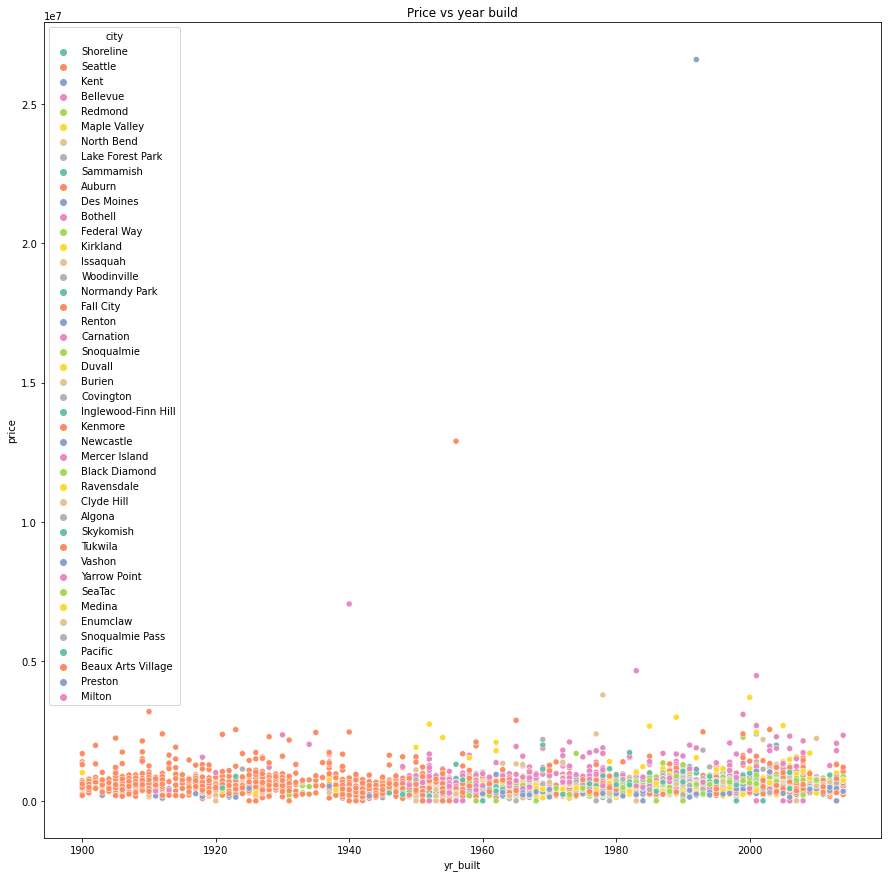

In [519]:
plt.figure(figsize=(15,15))
plt.title("Price vs year build")
sns.scatterplot(x='yr_built',y='price',data=df,palette='Set2',hue='city');

In [520]:
df['Current_year']=2023

In [521]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Current_year
0,2014-05-02 00:00:00,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2023
1,2014-05-02 00:00:00,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2023
2,2014-05-02 00:00:00,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2023
3,2014-05-02 00:00:00,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2023
4,2014-05-02 00:00:00,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2023


In [522]:
df['condition'].value_counts()

3    2875
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64

In [523]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Current_year
0,2014-05-02 00:00:00,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2023
1,2014-05-02 00:00:00,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2023
2,2014-05-02 00:00:00,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2023
3,2014-05-02 00:00:00,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2023
4,2014-05-02 00:00:00,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,2023
4596,2014-07-09 00:00:00,534333,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,2023
4597,2014-07-09 00:00:00,416904,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2023
4598,2014-07-10 00:00:00,203400,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,2023


In [524]:
# def remove_outlier(col):
#     sorted(col)
#     Q1,Q3=np.percentile(col,[25,75])
#     IQR=Q3-Q1
#     lower_range= Q1-(1.5 * IQR)
#     upper_range= Q3+(1.5 * IQR)
#     return lower_range, upper_range

In [525]:
df['sqft_above'].value_counts()

1010    47
1200    47
1300    45
1140    44
1320    43
        ..
2238     1
1341     1
3380     1
2286     1
4110     1
Name: sqft_above, Length: 511, dtype: int64

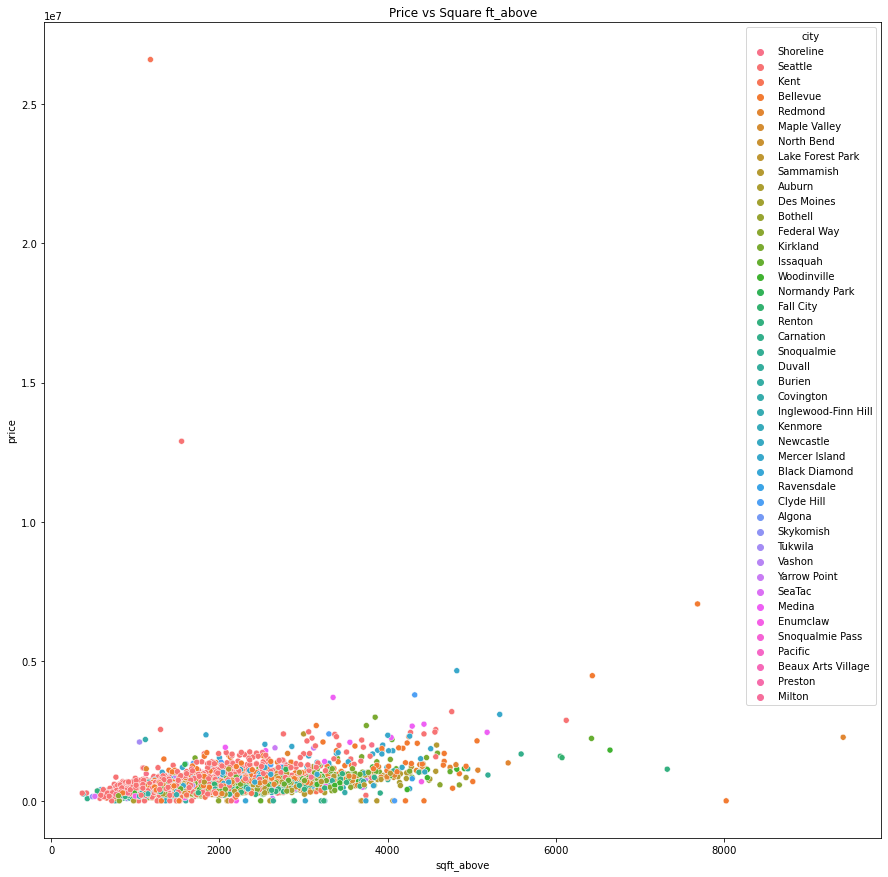

In [526]:
plt.figure(figsize=(15,15))
plt.title("Price vs Square ft_above")
sns.scatterplot(x=df['sqft_above'],y=df['price'],data=df,hue='city')
plt.show()

In [527]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Current_year
0,2014-05-02 00:00:00,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2023
1,2014-05-02 00:00:00,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2023
2,2014-05-02 00:00:00,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2023
3,2014-05-02 00:00:00,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2023
4,2014-05-02 00:00:00,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2023


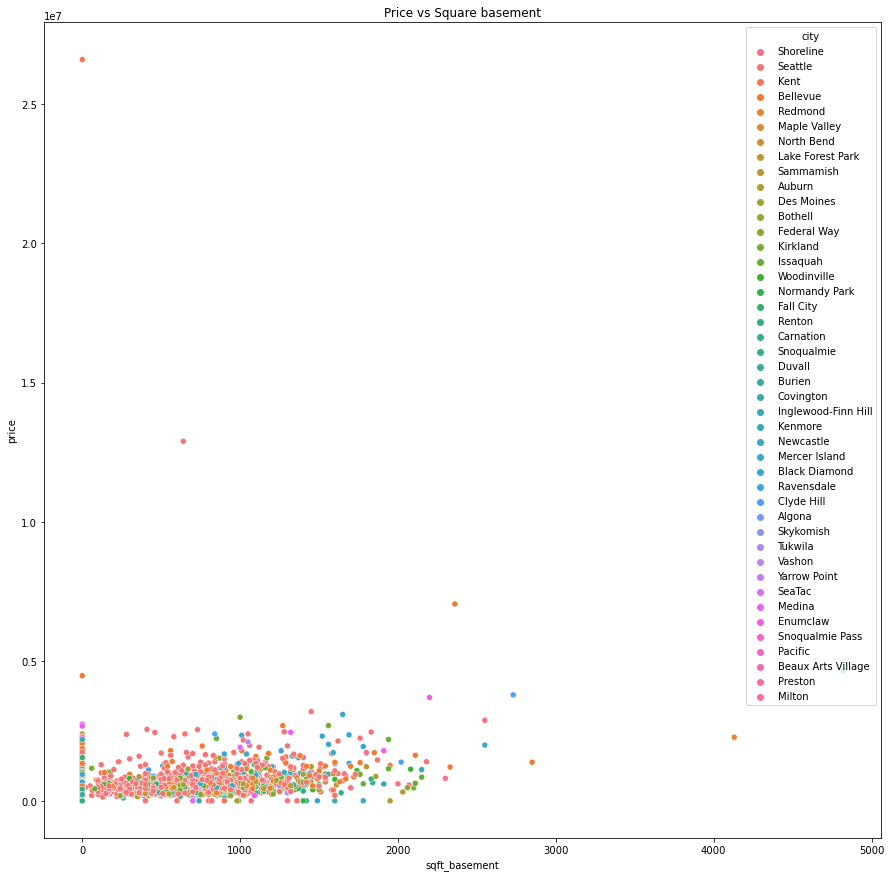

In [528]:
plt.figure(figsize=(15,15))
plt.title("Price vs Square basement")
sns.scatterplot(x=df['sqft_basement'],y=df['price'],data=df,hue='city')
plt.show()

In [529]:
# sns.pairplot(df,hue="price")
# plt.show()

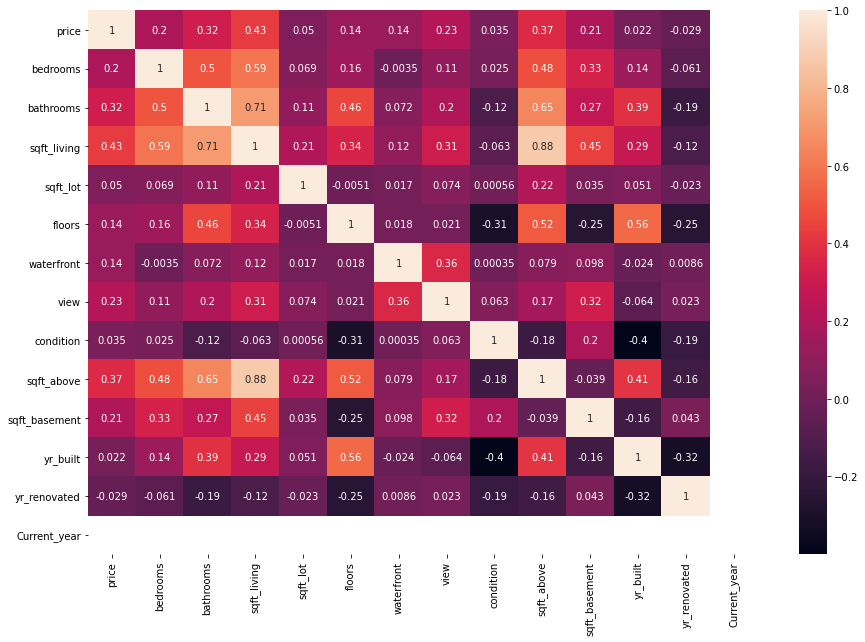

In [530]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True);

# Feature Engineering

In [531]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Current_year
0,2014-05-02 00:00:00,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2023
1,2014-05-02 00:00:00,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2023
2,2014-05-02 00:00:00,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2023
3,2014-05-02 00:00:00,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2023
4,2014-05-02 00:00:00,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2023


In [532]:
df['day']=pd.to_datetime(df['date']).dt.day
df['month']=pd.to_datetime(df['date']).dt.month

In [533]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Current_year,day,month
0,2014-05-02 00:00:00,313000,3,1,1340,7912,1,0,0,3,...,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2023,2,5
1,2014-05-02 00:00:00,2384000,5,2,3650,9050,2,0,4,5,...,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2023,2,5
2,2014-05-02 00:00:00,342000,3,2,1930,11947,1,0,0,4,...,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2023,2,5
3,2014-05-02 00:00:00,420000,3,2,2000,8030,1,0,0,4,...,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2023,2,5
4,2014-05-02 00:00:00,550000,4,2,1940,10500,1,0,0,4,...,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2023,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166,3,1,1510,6360,1,0,0,4,...,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,2023,9,7
4596,2014-07-09 00:00:00,534333,3,2,1460,7573,2,0,0,3,...,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,2023,9,7
4597,2014-07-09 00:00:00,416904,3,2,3010,7014,2,0,0,3,...,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2023,9,7
4598,2014-07-10 00:00:00,203400,4,2,2090,6630,1,0,0,3,...,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,2023,10,7


In [534]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'Current_year', 'day', 'month'],
      dtype='object')

In [535]:
df.drop(columns=['date','street'],inplace=True)

In [536]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country,Current_year,day,month
0,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,USA,2023,2,5
1,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,Seattle,WA 98119,USA,2023,2,5
2,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,Kent,WA 98042,USA,2023,2,5
3,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue,WA 98008,USA,2023,2,5
4,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,Redmond,WA 98052,USA,2023,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,Seattle,WA 98133,USA,2023,9,7
4596,534333,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,Bellevue,WA 98007,USA,2023,9,7
4597,416904,3,2,3010,7014,2,0,0,3,3010,0,2009,0,Renton,WA 98059,USA,2023,9,7
4598,203400,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,Seattle,WA 98178,USA,2023,10,7


In [537]:
df['Age_of_house']=df['Current_year']-df['yr_built']

In [538]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country,Current_year,day,month,Age_of_house
0,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,USA,2023,2,5,68
1,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,Seattle,WA 98119,USA,2023,2,5,102
2,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,Kent,WA 98042,USA,2023,2,5,57
3,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue,WA 98008,USA,2023,2,5,60
4,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,Redmond,WA 98052,USA,2023,2,5,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,Seattle,WA 98133,USA,2023,9,7,69
4596,534333,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,Bellevue,WA 98007,USA,2023,9,7,40
4597,416904,3,2,3010,7014,2,0,0,3,3010,0,2009,0,Renton,WA 98059,USA,2023,9,7,14
4598,203400,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,Seattle,WA 98178,USA,2023,10,7,49


In [539]:
df.drop(columns=['yr_built'],inplace=True)
df.drop(columns=['statezip'],inplace=True)

In [540]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,city,country,Current_year,day,month,Age_of_house
0,313000,3,1,1340,7912,1,0,0,3,1340,0,2005,Shoreline,USA,2023,2,5,68
1,2384000,5,2,3650,9050,2,0,4,5,3370,280,0,Seattle,USA,2023,2,5,102
2,342000,3,2,1930,11947,1,0,0,4,1930,0,0,Kent,USA,2023,2,5,57
3,420000,3,2,2000,8030,1,0,0,4,1000,1000,0,Bellevue,USA,2023,2,5,60
4,550000,4,2,1940,10500,1,0,0,4,1140,800,1992,Redmond,USA,2023,2,5,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166,3,1,1510,6360,1,0,0,4,1510,0,1979,Seattle,USA,2023,9,7,69
4596,534333,3,2,1460,7573,2,0,0,3,1460,0,2009,Bellevue,USA,2023,9,7,40
4597,416904,3,2,3010,7014,2,0,0,3,3010,0,0,Renton,USA,2023,9,7,14
4598,203400,4,2,2090,6630,1,0,0,3,1070,1020,0,Seattle,USA,2023,10,7,49


In [541]:
# a = pd.get_dummies(df['city'], prefix = "city")
b = pd.get_dummies(df['country'], prefix = "country")

In [542]:
frames = [df, b]
df = pd.concat(frames, axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,city,country,Current_year,day,month,Age_of_house,country_USA
0,313000,3,1,1340,7912,1,0,0,3,1340,0,2005,Shoreline,USA,2023,2,5,68,1
1,2384000,5,2,3650,9050,2,0,4,5,3370,280,0,Seattle,USA,2023,2,5,102,1
2,342000,3,2,1930,11947,1,0,0,4,1930,0,0,Kent,USA,2023,2,5,57,1
3,420000,3,2,2000,8030,1,0,0,4,1000,1000,0,Bellevue,USA,2023,2,5,60,1
4,550000,4,2,1940,10500,1,0,0,4,1140,800,1992,Redmond,USA,2023,2,5,47,1


In [543]:
df.drop(columns=['country'],inplace=True)

In [544]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,city,Current_year,day,month,Age_of_house,country_USA
0,313000,3,1,1340,7912,1,0,0,3,1340,0,2005,Shoreline,2023,2,5,68,1
1,2384000,5,2,3650,9050,2,0,4,5,3370,280,0,Seattle,2023,2,5,102,1
2,342000,3,2,1930,11947,1,0,0,4,1930,0,0,Kent,2023,2,5,57,1
3,420000,3,2,2000,8030,1,0,0,4,1000,1000,0,Bellevue,2023,2,5,60,1
4,550000,4,2,1940,10500,1,0,0,4,1140,800,1992,Redmond,2023,2,5,47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166,3,1,1510,6360,1,0,0,4,1510,0,1979,Seattle,2023,9,7,69,1
4596,534333,3,2,1460,7573,2,0,0,3,1460,0,2009,Bellevue,2023,9,7,40,1
4597,416904,3,2,3010,7014,2,0,0,3,3010,0,0,Renton,2023,9,7,14,1
4598,203400,4,2,2090,6630,1,0,0,3,1070,1020,0,Seattle,2023,10,7,49,1


In [545]:
df.drop(columns=['city'],inplace=True)

# SELECTION OF DEPENDENT AND INDEPENDENT

In [546]:
x=df.drop(columns=['price'])
y=df['price']

In [547]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,Current_year,day,month,Age_of_house,country_USA
0,3,1,1340,7912,1,0,0,3,1340,0,2005,2023,2,5,68,1
1,5,2,3650,9050,2,0,4,5,3370,280,0,2023,2,5,102,1
2,3,2,1930,11947,1,0,0,4,1930,0,0,2023,2,5,57,1
3,3,2,2000,8030,1,0,0,4,1000,1000,0,2023,2,5,60,1
4,4,2,1940,10500,1,0,0,4,1140,800,1992,2023,2,5,47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3,1,1510,6360,1,0,0,4,1510,0,1979,2023,9,7,69,1
4596,3,2,1460,7573,2,0,0,3,1460,0,2009,2023,9,7,40,1
4597,3,2,3010,7014,2,0,0,3,3010,0,0,2023,9,7,14,1
4598,4,2,2090,6630,1,0,0,3,1070,1020,0,2023,10,7,49,1


In [548]:
y

0        313000
1       2384000
2        342000
3        420000
4        550000
         ...   
4595     308166
4596     534333
4597     416904
4598     203400
4599     220600
Name: price, Length: 4600, dtype: int32

In [549]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_renovated', 'Current_year', 'day', 'month', 'Age_of_house',
       'country_USA'],
      dtype='object')

In [550]:
sd=StandardScaler()
x_scaled=sd.fit_transform(x)

In [551]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [552]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,Current_year,day,month,Age_of_house,country_USA
2958,4,2,2320,11717,2,0,0,3,2320,0,0,2023,20,6,26,1
1632,2,1,1880,7560,1,0,0,3,940,940,2001,2023,30,5,104,1
1564,4,1,1640,4240,1,0,0,5,920,720,0,2023,29,5,102,1
1959,3,1,1150,4825,1,0,0,4,1150,0,2001,2023,5,6,66,1
831,1,1,1140,6700,1,0,0,3,1140,0,1979,2023,16,5,103,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,3,1,1110,12150,1,0,0,4,1110,0,2001,2023,15,6,66,1
2952,4,2,2200,7700,1,0,0,3,1100,1100,2014,2023,20,6,44,1
4587,2,1,770,8149,1,0,0,3,770,0,1994,2023,8,7,75,1
356,6,3,3510,5760,2,0,0,4,3510,0,1990,2023,8,5,117,1


In [553]:
x_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,Current_year,day,month,Age_of_house,country_USA
245,3,2,1760,9055,2,0,0,4,1760,0,0,2023,7,5,38,1
1497,2,1,740,9003,1,0,0,3,740,0,1998,2023,28,5,74,1
512,3,1,1080,8100,1,0,0,4,1080,0,2009,2023,12,5,68,1
1778,5,2,2040,7488,1,0,0,4,1200,840,0,2023,3,6,54,1
4096,3,2,960,9380,1,0,0,3,960,0,1998,2023,8,7,74,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,3,1,1400,8100,1,0,0,3,1400,0,0,2023,8,7,79,1
2805,3,1,1510,4800,1,0,2,3,860,650,2011,2023,18,6,98,1
1227,2,1,1300,11867,1,0,0,4,1300,0,0,2023,23,5,48,1
4105,3,1,1180,16552,1,0,0,4,1180,0,0,2023,8,7,56,1


In [554]:
y_train

2958     397000
1632     280000
1564     635200
1959     240000
831      540000
         ...   
2527     416000
2952     279000
4587     229629
356     1750000
2933     725000
Name: price, Length: 3680, dtype: int32

In [555]:
y_test

245     460000
1497    157500
512     339000
1778    449500
4096    210000
         ...  
4073    267000
2805    465000
1227    225000
4105    390000
3614    339900
Name: price, Length: 920, dtype: int32

In [556]:
training_score=[]
testing_score=[]

In [557]:
def model_pred_unscaled(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    a = accuracy_score(y_train,y_pred_train)*100
    b = accuracy_score(y_test,y_pred)*100
    a.astype(int)
    b.astype(int)
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")

In [558]:
model_pred_unscaled(DecisionTreeClassifier())

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 0.32608695652173914

------------------------------------------------------------------------


In [559]:
model_pred_unscaled(RandomForestClassifier())

Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 0.21739130434782608

------------------------------------------------------------------------


In [560]:
model_pred_unscaled(AdaBoostClassifier())

Accuracy_Score of AdaBoostClassifier() model on Training Data is: 1.5217391304347827
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 0.9782608695652175

------------------------------------------------------------------------


In [562]:
model_pred_unscaled(LGBMClassifier())

Accuracy_Score of LGBMClassifier() model on Training Data is: 4.646739130434783
Accuracy_Score of LGBMClassifier() model on Testing Data is: 0.43478260869565216

------------------------------------------------------------------------


In [568]:
def model_pred_scaled(model):
    model.fit(x_train1,y_train1)
    y_pred1=model.predict(x_test1)
    y_pred_train1=model.predict(x_train1)
    a = accuracy_score(y_train1,y_pred_train1)*100
    b = accuracy_score(y_test1,y_pred1)*100
    a.astype(int)
    b.astype(int)
    training_score.append(a)
    testing_score.append(b)
        
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")

In [569]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_scaled,y,test_size=0.2,random_state=22)

In [570]:
model_pred_scaled(LogisticRegression())

Accuracy_Score of LogisticRegression() model on Training Data is: 10.625
Accuracy_Score of LogisticRegression() model on Testing Data is: 0.43478260869565216

------------------------------------------------------------------------


In [571]:
model_pred_scaled(KNeighborsClassifier())

Accuracy_Score of KNeighborsClassifier() model on Training Data is: 18.559782608695652
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 0.43478260869565216

------------------------------------------------------------------------


In [572]:
model_pred_scaled(SVC())

Accuracy_Score of SVC() model on Training Data is: 5.923913043478261
Accuracy_Score of SVC() model on Testing Data is: 1.0869565217391304

------------------------------------------------------------------------


In [573]:
model_pred_scaled(GaussianNB())

Accuracy_Score of GaussianNB() model on Training Data is: 35.434782608695656
Accuracy_Score of GaussianNB() model on Testing Data is: 0.10869565217391304

------------------------------------------------------------------------


In [575]:
models=['Decision Tree','Random Forest','ADA boosting','LGBM','Logistic Regression','KNN','SVC','Gaussian Naiye bayes']

In [578]:
training_score

[100.0,
 100.0,
 1.5217391304347827,
 4.646739130434783,
 10.625,
 18.559782608695652,
 10.625,
 18.559782608695652,
 5.923913043478261,
 35.434782608695656]

In [579]:
testing_score

[0.32608695652173914,
 0.21739130434782608,
 0.9782608695652175,
 0.43478260869565216,
 0.43478260869565216,
 0.43478260869565216,
 0.43478260869565216,
 0.43478260869565216,
 1.0869565217391304,
 0.10869565217391304]